In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data_Science/')
!pwd

/content/drive/MyDrive/Data_Science


In [ ]:
import pandas as pd
df = pd.read_csv("NO2.csv")
print(df)

          Date       NO2  Year     City
0    25-Apr-20  0.000074  2020  Bergamo
1     5-Apr-20  0.000074  2020  Bergamo
2    25-Apr-20  0.000075  2020  Bergamo
3    11-Apr-20  0.000076  2020  Bergamo
4     4-Apr-20  0.000077  2020  Bergamo
..         ...       ...   ...      ...
364  19-Feb-19  0.000629  2019    Wuhan
365  21-Feb-19  0.000630  2019    Wuhan
366   5-Mar-19  0.000711  2019    Wuhan
367  24-Feb-19  0.000766  2019    Wuhan
368  19-Feb-19  0.000786  2019    Wuhan

[369 rows x 4 columns]


# 1. Normality Tests,
## Histogram (rough estimate)
## Quantile-Quantile Plot visual
## Shapiro-Wilk Test use statics

```

## 1. Histogram (rough estimate)

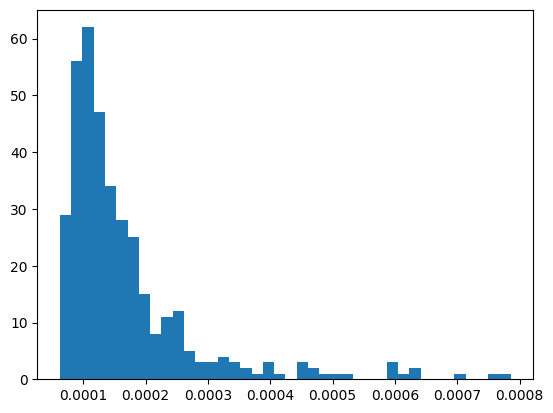

In [ ]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
#seed(1)
# generate univariate observations
#data = 66 * randn(100) # random data
data = df['NO2']
alpha = 0.5
# histogram plot
pyplot.hist(data, bins=40)
pyplot.show()

## 2. QQ Plot Normality test

In [ ]:
# QQ Plot Normality test
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#!pip install qqplot
# generate univariate observations
data = pd.read_csv("NO2.csv")
# q-q plot
qqplot(data ['NO2'], line='s')
pyplot.show()

NameError: name 'pd' is not defined


## 3. Shapiro-Wilk Test use statistic
##Tests whether a data sample has a Gaussian distribution.


Assumptions

Observations in each sample are independent and identically distributed (iid).
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.


---






In [ ]:
from scipy.stats import shapiro
data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print(f'stat={stat}, p={p}')
if p > 0.05:
	print('>Probably normally distributed')
else:
	print('>Probably not normally distributed')
 #Check for NO2 data
print(f"\nCheck if NO2 is normally distributed.")

data = df["NO2"]
stat, p = shapiro(data)
print(f'stat={stat}, p={p}')
if p > 0.05:
	print('>Probably normally distributed')
else:
	print('>Probably not normally distributed')

stat=0.8951008586832423, p=0.19340863556472415
>Probably normally distributed

Check if NO2 is normally distributed.
stat=0.7034934721182706, p=5.094048777699667e-25
>Probably not normally distributed


# 2. Correlation Tests


## 1. Pearson’s Correlation Coefficient
### Interpretation
Assumptions

>  Observations in each sample are independent and identically distributed (iid)

> Observations in each sample are normally distributed.

> Observations in each sample have the same variance.

> H0: the two samples are independent.

> H1: there is a dependency between the samples.

In [ ]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data_2019 = df[df["Year"] == 2019][:20] # NO2 data 2019 year, first 20
data_2020 = df[df["Year"] == 2020][:20] # NO2 data 2020 year, first 20
stat, p = pearsonr(data_2019["NO2"], data_2020["NO2"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('The correlation is statistically not significant')
else:
	print('The correlation is statistically significant and null hypothesis is accepted')

stat=0.923, p=0.000
The correlation is statistically significant and null hypothesis is accepted


## 2. Chi-Squared Test
### Tests whether two categorical variables are related or independent.
A common problem in applied machine learning is determining whether input features are relevant to the outcome to be predicted.

Example: features selection in machine learning

>H0: the two samples are independent.

>H1: there is a dependency between the samples.

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['City'], df['Year'], normalize=True)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

chi2_contingency(table)

Year           2019      2020
City                         
Bergamo    0.108401  0.105691
Madrid     0.092141  0.105691
New Delhi  0.119241  0.127371
New York   0.035230  0.032520
Qom        0.062331  0.051491
Wuhan      0.094851  0.065041
stat=0.007, p=1.000
Probably independent


(0.007338546406672462, 0.9999997552426171, 5, array([[0.10965695, 0.10443519],
        [0.10132857, 0.0965034 ],
        [0.1263137 , 0.12029876],
        [0.03470157, 0.03304911],
        [0.05829863, 0.05552251],
        [0.0818957 , 0.0779959 ]]))

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['Year'], df['City'], normalize=True)
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

chi2_contingency(table)

City   Bergamo    Madrid  New Delhi  New York       Qom     Wuhan
Year                                                             
2019  0.108401  0.092141   0.119241   0.03523  0.062331  0.094851
2020  0.105691  0.105691   0.127371   0.03252  0.051491  0.065041
stat=0.007, p=1.000
Probably independent


(0.007338546406672462,
 0.9999997552426171,
 5,
 array([[0.10965695, 0.10132857, 0.1263137 , 0.03470157, 0.05829863,
         0.0818957 ],
        [0.10443519, 0.0965034 , 0.12029876, 0.03304911, 0.05552251,
         0.0779959 ]]))

# 3. Parametric Statistical Hypothesis Tests
## 1. Student’s t-test
Tests whether the means of two independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
>H0: the means of the samples are equal.

>H1: the means of the samples are unequal.


In [ ]:
from scipy.stats import ttest_ind
data_2019 = df[df["Year"] == 2019] # NO2 data 2019 year
data_2020 = df[df["Year"] == 2020] # NO2 data 2020 year
stat, p = ttest_ind(data_2019['NO2'], data_2020['NO2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=9.976, p=0.000
Probably different distributions


## 2. Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.


>H0: the means of the samples are equal.

>H1: the means of the samples are unequal.


In [ ]:
from scipy.stats import ttest_rel
data_2019 = df[df["Year"] == 2019][:20] # NO2 data 2019 year, first 20
data_2020 = df[df["Year"] == 2020][:20] # NO2 data 2020 year, first 20
stat, p = ttest_rel(data_2019['NO2'], data_2020['NO2'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=23.519, p=0.000
Probably different distributions


# 3. Analysis of Variance Test (ANOVA)

>H0: the means of the samples are equal.

>H1: one or more of the means of the samples are unequal.

In [ ]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


# **Recommendaed topics for home assignments**
Correlation Tests
1. Spearman’s Rank Correlation
2. This is formatted as code
3. Kendall’s Rank Correlation

Nonparametric Statistical Hypothesis Tests
1. Mann-Whitney U Test
2. Wilcoxon Signed-Rank Test
3. Kruskal-Wallis H Test